In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

In [3]:
# Load the data
data = pd.read_csv('pokemon_alopez247.csv')

In [4]:
# Preprocess the data
label_encoders = {}
categorical_columns = ['Name', 'Type_1', 'Type_2', 'Color', 'Egg_Group_1', 'Egg_Group_2', 'Body_Style', 'isLegendary', 'hasGender', 'hasMegaEvolution']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Define features and target
features = data.drop(['Generation'], axis=1)
target = data['Generation']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
# Initialize the model
clf = DecisionTreeClassifier()

In [12]:
# Perform stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(clf, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

In [13]:
# Output cross-validation results
print(f'Stratified cross-validation accuracy scores: {cv_results}')
print(f'Mean stratified cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of stratified cross-validation accuracy: {cv_results.std()}')

Stratified cross-validation accuracy scores: [1.         1.         0.99130435 0.99130435 0.99130435]
Mean stratified cross-validation accuracy: 0.9947826086956522
Standard deviation of stratified cross-validation accuracy: 0.004259982161362024


In [9]:
# Train the model on the full training data
clf = clf.fit(X_train, y_train)

In [14]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model on the test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy}')

Accuracy on test set: 1.0


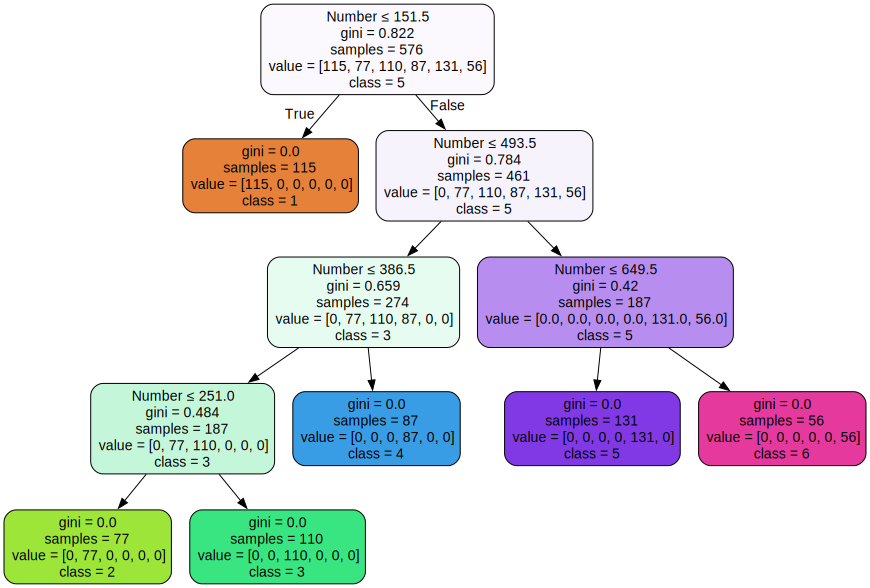

In [15]:
# Visualize the Decision Tree
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=features.columns,  
                           class_names=[str(gen) for gen in sorted(data['Generation'].unique())],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)

# Display the graph directly in the notebook
display(graph)